In [21]:
import numpy as np

def PCA(X , num_components):
    
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
    
    #Step-2 Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    #Step-3 Computataion of eigen vector and eigen values
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
    #Step-4 
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    print(X_reduced[1:15])
    return X_reduced


In [22]:
import pandas as pd

#Get the IRIS dataset and print
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

data = pd.read_csv("iris.csv", names=['sepal length','sepal width','petal length','petal width','target'])
#data = pd.read_csv("iris.csv")

#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

[[ 2.71539062 -0.16955685]
 [ 2.88981954 -0.13734561]
 [ 2.7464372  -0.31112432]
 [ 2.72859298  0.33392456]
 [ 2.27989736  0.74778271]
 [ 2.82089068 -0.08210451]
 [ 2.62648199  0.17040535]
 [ 2.88795857 -0.57079803]
 [ 2.67384469 -0.1066917 ]
 [ 2.50652679  0.65193501]
 [ 2.61314272  0.02152063]
 [ 2.78743398 -0.22774019]
 [ 3.22520045 -0.50327991]
 [ 2.64354322  1.1861949 ]]


In [23]:
# For printing dataset
data
data.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

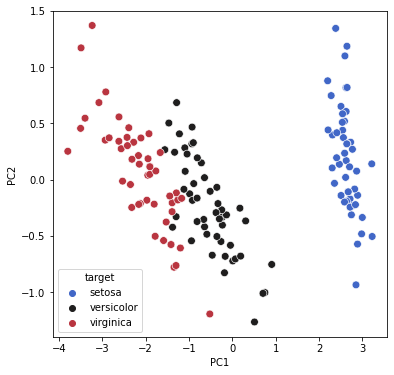

In [24]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
#colors = ['r','g','b']
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')